# SlicedLHD Basic Example

Demonstrates maximin-distance Sliced Latin Hypercube Designs for space-filling computer experiments.

In [1]:
import sys
from pathlib import Path

# Add project root so "import gethypercube" works when running from the repo
_root = Path.cwd()
if (_root / "gethypercube").is_dir():
    pass
elif (_root.parent / "gethypercube").is_dir():
    _root = _root.parent
if str(_root) not in sys.path:
    sys.path.insert(0, str(_root))

import numpy as np
import matplotlib.pyplot as plt
import time

from gethypercube import maximinSLHD, SLHDResult
from gethypercube.sliced_lhd.construction import random_slhd
from gethypercube.sliced_lhd.objective import compute_phi
from gethypercube.sliced_lhd import is_valid_slhd

plt.rcParams["figure.facecolor"] = "white"

## 1. Standard maximin LHD (t=1)

A single slice yields a standard maximin-distance Latin Hypercube Design.

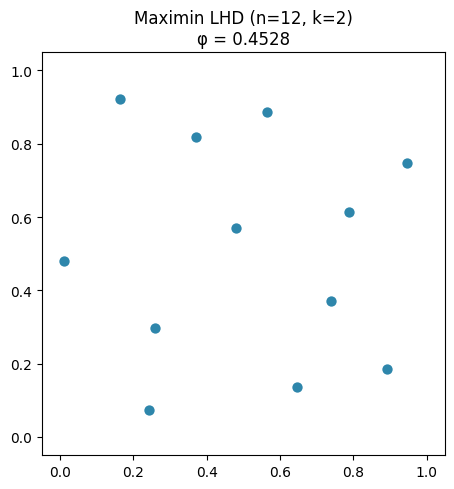

In [2]:
result = maximinSLHD(t=1, m=12, k=2, random_state=42, total_iter=50_000)

fig, ax = plt.subplots(figsize=(5, 5))
D = result.std_design
ax.scatter(D[:, 0], D[:, 1], s=80, c="#2e86ab", edgecolors="white", linewidths=1.5, zorder=3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect("equal")
ax.set_title(f"Maximin LHD (n=12, k=2)\nφ = {result.measure:.4f}")
plt.tight_layout()
plt.show()

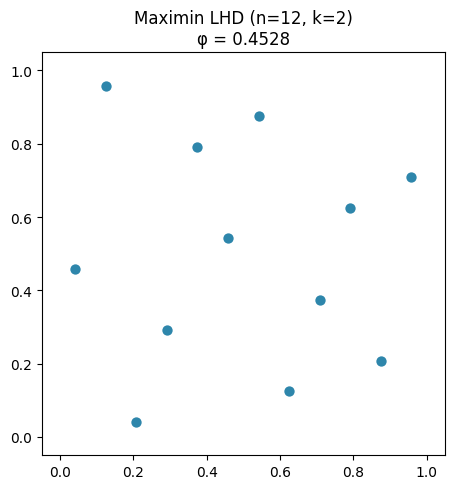

In [3]:
result = maximinSLHD(t=1, m=12, k=2, random_state=42, total_iter=50_000, scramble=False)

fig, ax = plt.subplots(figsize=(5, 5))
D = result.std_design
ax.scatter(D[:, 0], D[:, 1], s=80, c="#2e86ab", edgecolors="white", linewidths=1.5, zorder=3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect("equal")
ax.set_title(f"Maximin LHD (n=12, k=2)\nφ = {result.measure:.4f}")
plt.tight_layout()
plt.show()

## 2. Sliced LHD (t > 1)

Multiple slices: each slice is a valid LHD, useful for qualitative factors.

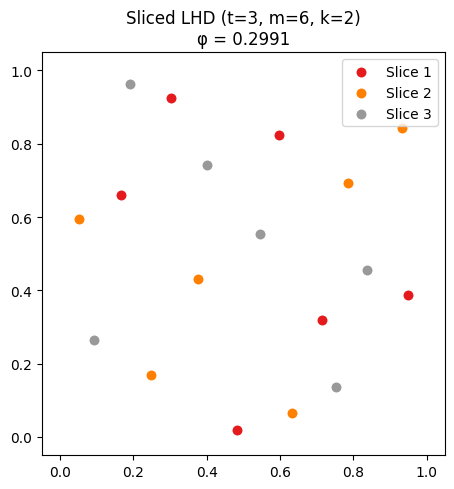

In [4]:
result = maximinSLHD(t=3, m=6, k=2, random_state=42, total_iter=50_000)

fig, ax = plt.subplots(figsize=(5, 5))
D = result.std_design
slices = D[:, 0].astype(int)
colors = plt.cm.Set1(np.linspace(0, 1, result.n_slices))
for s in range(1, result.n_slices + 1):
    mask = slices == s
    ax.scatter(D[mask, 1], D[mask, 2], s=70, c=[colors[s - 1]], label=f"Slice {s}",
               edgecolors="white", linewidths=1.2, zorder=3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect("equal")
ax.legend()
ax.set_title(f"Sliced LHD (t=3, m=6, k=2)\nφ = {result.measure:.4f}")
plt.tight_layout()
plt.show()

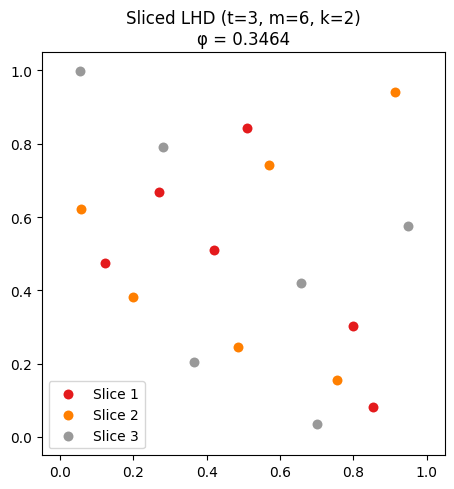

In [5]:
result = maximinSLHD(t=3, m=6, k=2, random_state=17, total_iter=50_000)

fig, ax = plt.subplots(figsize=(5, 5))
D = result.std_design
slices = D[:, 0].astype(int)
colors = plt.cm.Set1(np.linspace(0, 1, result.n_slices))
for s in range(1, result.n_slices + 1):
    mask = slices == s
    ax.scatter(D[mask, 1], D[mask, 2], s=70, c=[colors[s - 1]], label=f"Slice {s}",
               edgecolors="white", linewidths=1.2, zorder=3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect("equal")
ax.legend()
ax.set_title(f"Sliced LHD (t=3, m=6, k=2)\nφ = {result.measure:.4f}")
plt.tight_layout()
plt.show()

## 3. 3D design

Higher-dimensional design with a 2D projection.

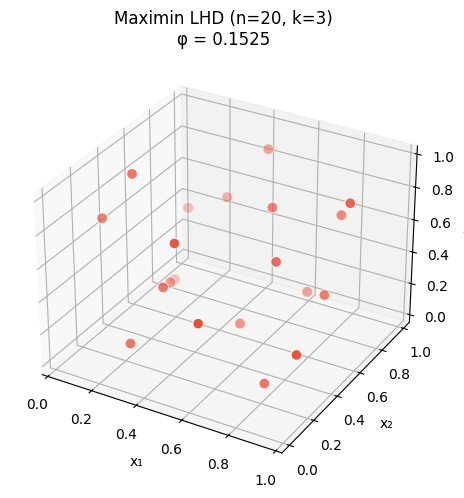

In [6]:
result = maximinSLHD(t=1, m=20, k=3, random_state=123, total_iter=80_000)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")
D = result.std_design
ax.scatter(D[:, 0], D[:, 1], D[:, 2], s=60, c="#e94f37", edgecolors="white", linewidths=0.8)
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("x₃")
ax.set_title(f"Maximin LHD (n=20, k=3)\nφ = {result.measure:.4f}")
plt.tight_layout()
plt.show()

## 4. Random vs optimized

Compare φ (lower = better spread) for random construction vs simulated annealing.

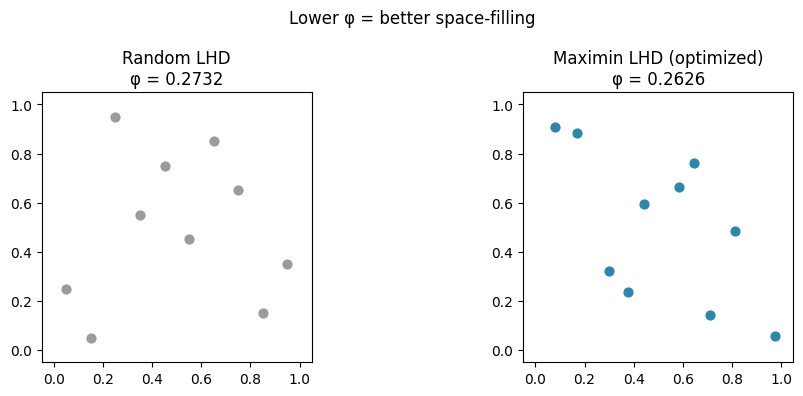

In [7]:
rng = np.random.default_rng(42)
D_rand = random_slhd(t=1, m=10, k=3, rng=rng)
result_opt = maximinSLHD(t=1, m=10, k=3, random_state=42, total_iter=50_000)

phi_rand = compute_phi(D_rand.astype(float), r=15)
phi_opt = result_opt.measure

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
D_rand_std = (D_rand - 0.5) / 10
axes[0].scatter(D_rand_std[:, 0], D_rand_std[:, 1], s=70, c="#9b9b9b", edgecolors="white", linewidths=1)
axes[0].set_title(f"Random LHD\nφ = {phi_rand:.4f}")
axes[0].set_xlim(-0.05, 1.05)
axes[0].set_ylim(-0.05, 1.05)
axes[0].set_aspect("equal")

D_opt = result_opt.std_design
axes[1].scatter(D_opt[:, 0], D_opt[:, 1], s=70, c="#2e86ab", edgecolors="white", linewidths=1)
axes[1].set_title(f"Maximin LHD (optimized)\nφ = {phi_opt:.4f}")
axes[1].set_xlim(-0.05, 1.05)
axes[1].set_ylim(-0.05, 1.05)
axes[1].set_aspect("equal")
plt.suptitle("Lower φ = better space-filling")
plt.tight_layout()
plt.show()

## 5. Validation & API summary

Verify SLHD constraint and inspect `SLHDResult`.

In [8]:
result = maximinSLHD(t=2, m=5, k=3, random_state=99)
# Raw design has slice column when t > 1
design_raw = result.design
D = design_raw[:, 1:]  # design variables only
t, m, k = result.n_slices, result.n_per_slice, result.n_dims
n = t * m

is_valid = is_valid_slhd(D, t=t, m=m)

print(f"design shape: {result.design.shape}")
print(f"std_design shape: {result.std_design.shape}")
print(f"measure (φ): {result.measure:.4f}")
print(f"n_slices: {t}, n_per_slice: {m}, n_dims: {k}")
print(f"Valid SLHD: {is_valid}")
print(f"\nFirst 5 rows of design:\n{result.design[:5]}")

design shape: (10, 4)
std_design shape: (10, 4)
measure (φ): 0.2257
n_slices: 2, n_per_slice: 5, n_dims: 3
Valid SLHD: True

First 5 rows of design:
[[ 1  9  4  5]
 [ 1  1  6  8]
 [ 1  5  2  3]
 [ 1  3 10  9]
 [ 1  7  8  2]]


### SLHD validation statistics

The following checks confirm the design is a proper sliced Latin Hypercube:

1. **Full LHD**: Each column contains values 1..n exactly once.
2. **Slice LHD**: Each slice×column has one value from each level bin Π₁, …, Πₘ where Πₗ = {(ℓ−1)t+1, …, ℓt}.

**Check 1: Full LHD** — Each column must contain values 1..n exactly once (one point per level per dimension).

**Check 2: Slice LHD** — Each slice×column must have one value from each level bin Π_ℓ = {(ℓ−1)t+1, …, ℓt}. Map raw value x to level via ceil(x/t) ∈ {1..m}. Each slice of m rows is itself an LHD.

In [9]:
# Use D, t, m, k, n from previous cell
print("=" * 50)
print("Full design LHD check")
print("=" * 50)
full_ok = True
for j in range(k):
    col = D[:, j]
    has_all = set(col) == set(range(1, n + 1))
    full_ok = full_ok and has_all
    status = "✓" if has_all else "✗"
    print(f"  Column {j + 1}: {status} values = {{1..{n}}} exactly once")
print(f"\n  Result: {'PASS — full design is a valid LHD' if full_ok else 'FAIL'}")

print("\n" + "=" * 50)
print("Slice LHD check (each slice has one per level bin)")
print("=" * 50)
slice_ok = True
for s in range(t):
    for j in range(k):
        slice_col = D[s * m : (s + 1) * m, j]
        levels = np.ceil(slice_col.astype(float) / t).astype(int)
        has_all = set(levels) == set(range(1, m + 1))
        slice_ok = slice_ok and has_all
        status = "✓" if has_all else "✗"
        print(f"  Slice {s + 1}, col {j + 1}: {status} ceil(x/t) = {{1..{m}}} exactly once")
print(f"\n  Result: {'PASS — each slice is a valid LHD' if slice_ok else 'FAIL'}")

Full design LHD check
  Column 1: ✓ values = {1..10} exactly once
  Column 2: ✓ values = {1..10} exactly once
  Column 3: ✓ values = {1..10} exactly once

  Result: PASS — full design is a valid LHD

Slice LHD check (each slice has one per level bin)
  Slice 1, col 1: ✓ ceil(x/t) = {1..5} exactly once
  Slice 1, col 2: ✓ ceil(x/t) = {1..5} exactly once
  Slice 1, col 3: ✓ ceil(x/t) = {1..5} exactly once
  Slice 2, col 1: ✓ ceil(x/t) = {1..5} exactly once
  Slice 2, col 2: ✓ ceil(x/t) = {1..5} exactly once
  Slice 2, col 3: ✓ ceil(x/t) = {1..5} exactly once

  Result: PASS — each slice is a valid LHD


## Handwritten check

## t=1

In [10]:
k = 4
m = 100
start_time = time.time()
result = maximinSLHD(t=1, m=m, k=k, random_state=42, total_iter=50_000)
end_time = time.time()
D = result.std_design
print(D.shape)
print(f"Time taken: {end_time - start_time} seconds")

(100, 4)
Time taken: 3.3070011138916016 seconds


**Check 3: Marginal uniformity** — Each column should have uniform marginal on [0,1]. Black = empirical CDF, grey = theoretical U(0,1) CDF. For a valid LHD, the curves should align.

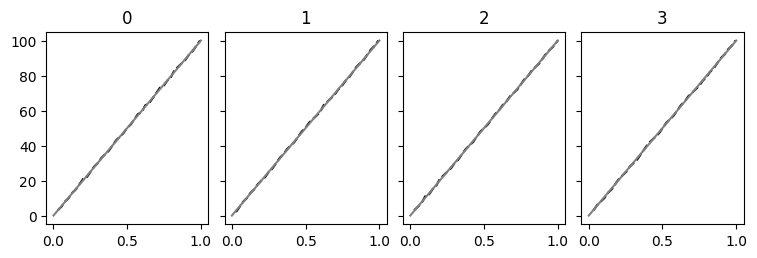

In [11]:
fig, ax = plt.subplots(1, k, figsize=(9, 2.5), sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(k):
    #ax[i].scatter(sample[:, i], np.zeros(m), s=10)
    values, base = np.histogram(D[:, i], bins=40)
    cumulative = np.cumsum(values)
    # plot empirical CDF: cumulative[j] = count in [base[0], base[j+1]), so x = base[j+1]
    ax[i].plot(base[1:], cumulative, c='k', ls='--')
    ax[i].set_xlim(-0.05, 1.05)
    ax[i].set_title(f"{i}")
    xx = np.linspace(0, 1, 100)
    ax[i].plot(xx, len(D)*xx, c='grey', ls='-')

In [12]:
k = 4
m = 100
start_time = time.time()
result = maximinSLHD(t=1, m=m, k=k, random_state=42, total_iter=50_000, scramble=False)
end_time = time.time()
D = result.std_design
print(D.shape)
print(f"Time taken: {end_time - start_time} seconds")

(100, 4)
Time taken: 3.130007028579712 seconds


Same marginal uniformity check for maximinSLHD with `scramble=False`.

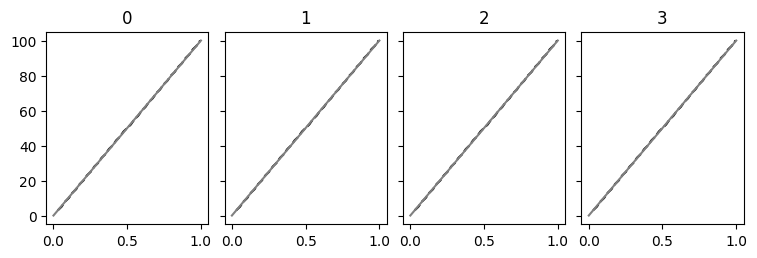

In [13]:
fig, ax = plt.subplots(1, k, figsize=(9, 2.5), sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(k):
    #ax[i].scatter(sample[:, i], np.zeros(m), s=10)
    values, base = np.histogram(D[:, i], bins=40)
    cumulative = np.cumsum(values)
    # plot empirical CDF: cumulative[j] = count in [base[0], base[j+1]), so x = base[j+1]
    ax[i].plot(base[1:], cumulative, c='k', ls='--')
    ax[i].set_xlim(-0.05, 1.05)
    ax[i].set_title(f"{i}")
    xx = np.linspace(0, 1, 100)
    ax[i].plot(xx, len(D)*xx, c='grey', ls='-')

In [14]:
from scipy.stats import qmc
rng = np.random.default_rng(42)
sampler = qmc.LatinHypercube(d=k, rng=rng)
sample = sampler.random(n=m)
print(sample.shape)

(100, 4)


Marginal uniformity check for scipy scrambled LHD sample.

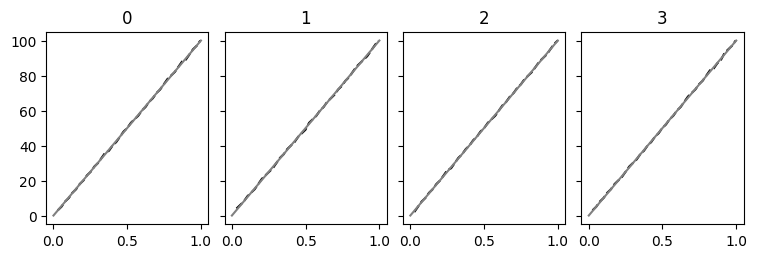

In [15]:
fig, ax = plt.subplots(1, k, figsize=(9, 2.5), sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(k):
    #ax[i].scatter(sample[:, i], np.zeros(m), s=10)
    values, base = np.histogram(sample[:, i], bins=40)
    cumulative = np.cumsum(values)
    # plot empirical CDF: cumulative[j] = count in [base[0], base[j+1]), so x = base[j+1]
    ax[i].plot(base[1:], cumulative, c='k', ls='--')
    ax[i].set_xlim(-0.05, 1.05)
    ax[i].set_title(f"{i}")
    xx = np.linspace(0, 1, 100)
    ax[i].plot(xx, len(D)*xx, c='grey', ls='-')

In [16]:
from scipy.stats import qmc
rng = np.random.default_rng(42)
sampler_grid = qmc.LatinHypercube(d=k, rng=rng, scramble=False)
sample_grid = sampler_grid.random(n=m)
print(sample_grid.shape)

(100, 4)


Marginal uniformity check for scipy unscrambled (grid) LHD sample.

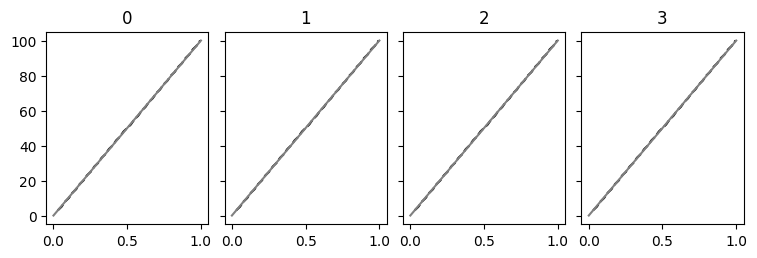

In [17]:
fig, ax = plt.subplots(1, k, figsize=(9, 2.5), sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(k):
    #ax[i].scatter(sample[:, i], np.zeros(m), s=10)
    values, base = np.histogram(sample_grid[:, i], bins=40)
    cumulative = np.cumsum(values)
    # plot empirical CDF: cumulative[j] = count in [base[0], base[j+1]), so x = base[j+1]
    ax[i].plot(base[1:], cumulative, c='k', ls='--')
    ax[i].set_xlim(-0.05, 1.05)
    ax[i].set_title(f"{i}")
    xx = np.linspace(0, 1, 100)
    ax[i].plot(xx, len(D)*xx, c='grey', ls='-')

In [18]:
t = 5
k = 2
m = 20
start_time = time.time()
result = maximinSLHD(t=t, m=m, k=k, random_state=42, total_iter=50_000)
end_time = time.time()
D = result.std_design
print(D.shape)
print(f"Time taken: {end_time - start_time} seconds")

(100, 3)
Time taken: 7.532979249954224 seconds


**Per-slice marginal uniformity** — Each slice×column should have U(0,1) marginal. Plot empirical CDF vs theoretical for each slice separately.

In [19]:
slices = D[:, 0].astype(int)

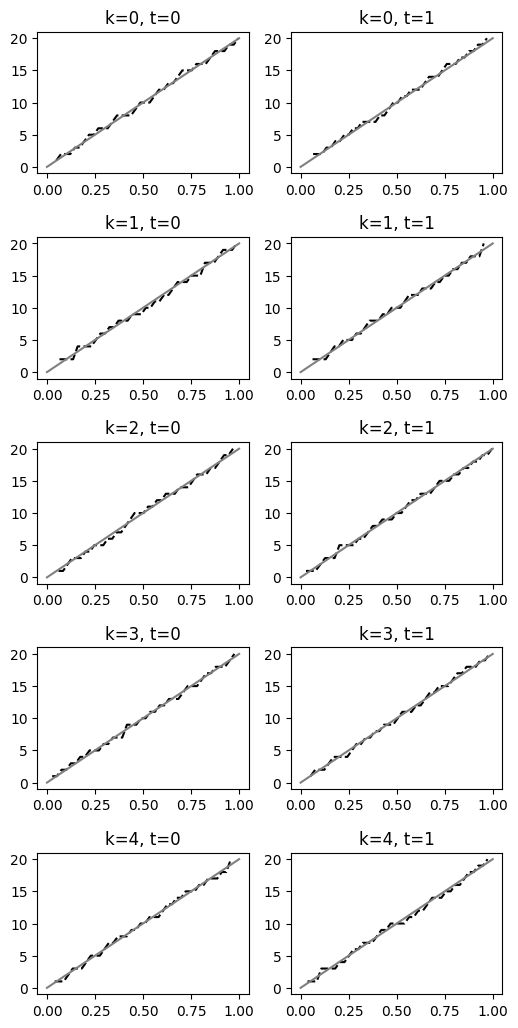

In [20]:
fig, ax = plt.subplots(t, k, figsize=(6, 2.5*t))
plt.subplots_adjust(hspace=0.45, wspace=0.2)
for i in range(t):
    for j in range(k):
    
        #ax[i].scatter(sample[:, i], np.zeros(m), s=10)
        D_vals = D[slices == i+1, j+1]
        values, base = np.histogram(D_vals, bins=40)
        cumulative = np.cumsum(values)
        # plot empirical CDF: cumulative[j] = count in [base[0], base[j+1]), so x = base[j+1]
        ax[i][j].plot(base[1:], cumulative, c='k', ls='--')
        ax[i][j].set_xlim(-0.05, 1.05)
        ax[i][j].set_title(f"k={i}, t={j}")
        xx = np.linspace(0, 1, 100)
        ax[i][j].plot(xx, len(D_vals)*xx, c='grey', ls='-')